<a href="https://colab.research.google.com/github/AnatoliiNovyk/math_hw/blob/main/%D0%94%D0%9710_%D0%9D%D0%9E%D0%92%D0%98%D0%9A_%D0%90%D0%9D%D0%90%D0%A2%D0%9E%D0%9B%D0%86%D0%99_%D0%92%D0%9E%D0%9B%D0%9E%D0%94%D0%98%D0%9C%D0%98%D0%A0%D0%9E%D0%92%D0%98%D0%A7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Фінальний проект: Аналіз та прогнозування орендної плати

**Мета проекту:** Проаналізувати фактори, що впливають на вартість оренди житла, та побудувати моделі машинного навчання для прогнозування орендної плати.

## Етапи проекту:

**1. Імпорт необхідних бібліотек.** \\
\
**2. Завантаження даних.** \\
\
**3. Попередній аналіз даних (EDA).** \\
\
**4. Обробка даних та інженерія ознак.** \\
* Обробка пропущених значень (якщо є). \\
* Обробка категоріальних ознак. \\
* Видалення непотрібних ознак. \\
* (Опціонально) Аналіз мультиколінеарності (VIF). \\

\
**5. Розділення даних та Масштабування.** \\

\
**6. Побудова та навчання моделей.** \\
* (Опціонально) Пошук оптимальних гіперпараметрів (GridSearchCV). \\
* Модель 1: Лінійна регресія. \\
* Модель 2: Випадковий ліс (Random Forest). \\

\
**7. Оцінка моделей.** \\
* Використання метрик регресії (R², MSE, RMSE). \\

\
**8. Аналіз результатів.** \\
* Візуалізація прогнозів (Actual vs. Predicted). \\
* (Опціонально) Аналіз залишків (Residuals Plot). \\
* (Опціонально) Аналіз важливості ознак (Feature Importance). \\
* Висновки та рекомендації. \\

## 1. Імпорт необхідних бібліотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV # Додано GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
# Додано для VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant


# Налаштування для кращої візуалізації
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Усі необхідні бібліотеки успішно імпортовано!")

Усі необхідні бібліотеки успішно імпортовано!


## 2. Завантаження даних

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Завантажуємо датасет.
try:
    df = pd.read_csv('/content/drive/MyDrive/GOIT/dataset/House_Rent_Prediction - House_Rent_Dataset.csv')
    print("Датасет успішно завантажено.")
except FileNotFoundError:
    print("Помилка: Файл 'House_Rent_Prediction - House_Rent_Dataset.csv' не знайдено.")
    print("Будь ласка, перевірте шлях до файлу.")
    # Зупинити виконання, якщо файл не знайдено
    # (або додати код для завантаження з іншого джерела)
    raise

Датасет успішно завантажено.


## 3. Попередній аналіз даних (EDA)

### 3.1. Загальний огляд

In [4]:
# Перший погляд на дані
print("Перші 5 рядків даних:")
print(df.head())
print("\nОстанні 5 рядків даних:")
print(df.tail())

Перші 5 рядків даних:
    Posted On  BHK   Rent  Size            Floor    Area Type  \
0  2022-05-18    2  10000  1100  Ground out of 2   Super Area   
1  2022-05-13    2  20000   800       1 out of 3   Super Area   
2  2022-05-16    2  17000  1000       1 out of 3   Super Area   
3  2022-07-04    2  10000   800       1 out of 2   Super Area   
4  2022-05-09    2   7500   850       1 out of 2  Carpet Area   

              Area Locality     City Furnishing Status  Tenant Preferred  \
0                    Bandel  Kolkata       Unfurnished  Bachelors/Family   
1  Phool Bagan, Kankurgachi  Kolkata    Semi-Furnished  Bachelors/Family   
2   Salt Lake City Sector 2  Kolkata    Semi-Furnished  Bachelors/Family   
3               Dumdum Park  Kolkata       Unfurnished  Bachelors/Family   
4             South Dum Dum  Kolkata       Unfurnished         Bachelors   

   Bathroom Point of Contact  
0         2    Contact Owner  
1         1    Contact Owner  
2         1    Contact Owner  
3     

In [5]:
# Розмір датасету
print(f"\nРозмір датасету: {df.shape}")


Розмір датасету: (4746, 12)


In [6]:
# Інформація про типи даних та пропуски
print("\nІнформація про датасет:")
df.info()


Інформація про датасет:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


### 3.2. Перевірка пропущених значень

In [7]:
# Перевірка на пропущені значення
print("\nКількість пропущених значень по стовпцях:")
print(df.isnull().sum())
# Як бачимо, пропущених значень немає


Кількість пропущених значень по стовпцях:
Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64


### 3.3. Описова статистика та унікальні значення

In [8]:
# Описова статистика для числових ознак
print("\nОписова статистика:")
print(df.describe())


Описова статистика:
               BHK          Rent         Size     Bathroom
count  4746.000000  4.746000e+03  4746.000000  4746.000000
mean      2.083860  3.499345e+04   967.490729     1.965866
std       0.832256  7.810641e+04   634.202328     0.884532
min       1.000000  1.200000e+03    10.000000     1.000000
25%       2.000000  1.000000e+04   550.000000     1.000000
50%       2.000000  1.600000e+04   850.000000     2.000000
75%       3.000000  3.300000e+04  1200.000000     2.000000
max       6.000000  3.500000e+06  8000.000000    10.000000


In [9]:
# Аналіз кількості унікальних значень
print("\nКількість унікальних значень:")
print(df.nunique())


Кількість унікальних значень:
Posted On              81
BHK                     6
Rent                  243
Size                  615
Floor                 480
Area Type               3
Area Locality        2235
City                    6
Furnishing Status       3
Tenant Preferred        3
Bathroom                8
Point of Contact        3
dtype: int64


### 3.4. Аналіз розподілів

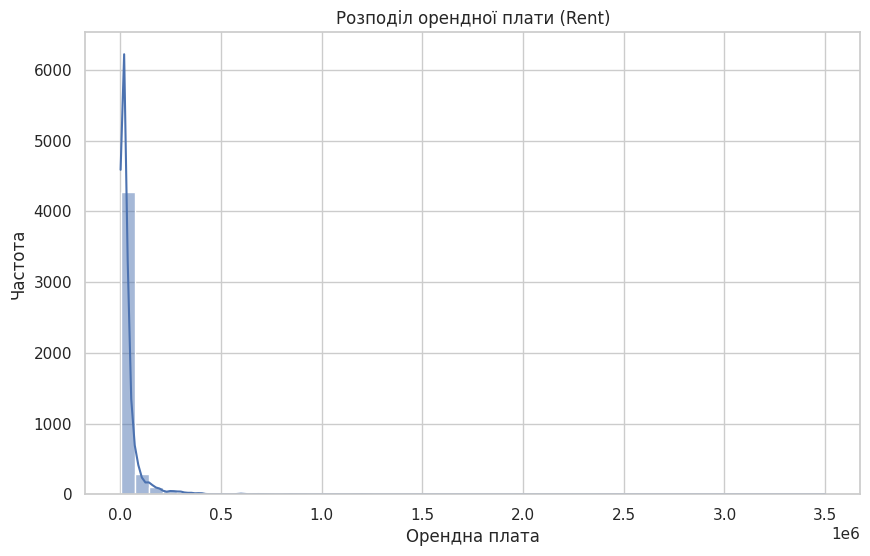

In [10]:
# Візуалізація розподілу цільової змінної 'Rent'
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'], kde=True, bins=50)
plt.title('Розподіл орендної плати (Rent)')
plt.xlabel('Орендна плата')
plt.ylabel('Частота')
plt.show()
# Бачимо, що розподіл має довгий правий хвіст (позитивна асиметрія)

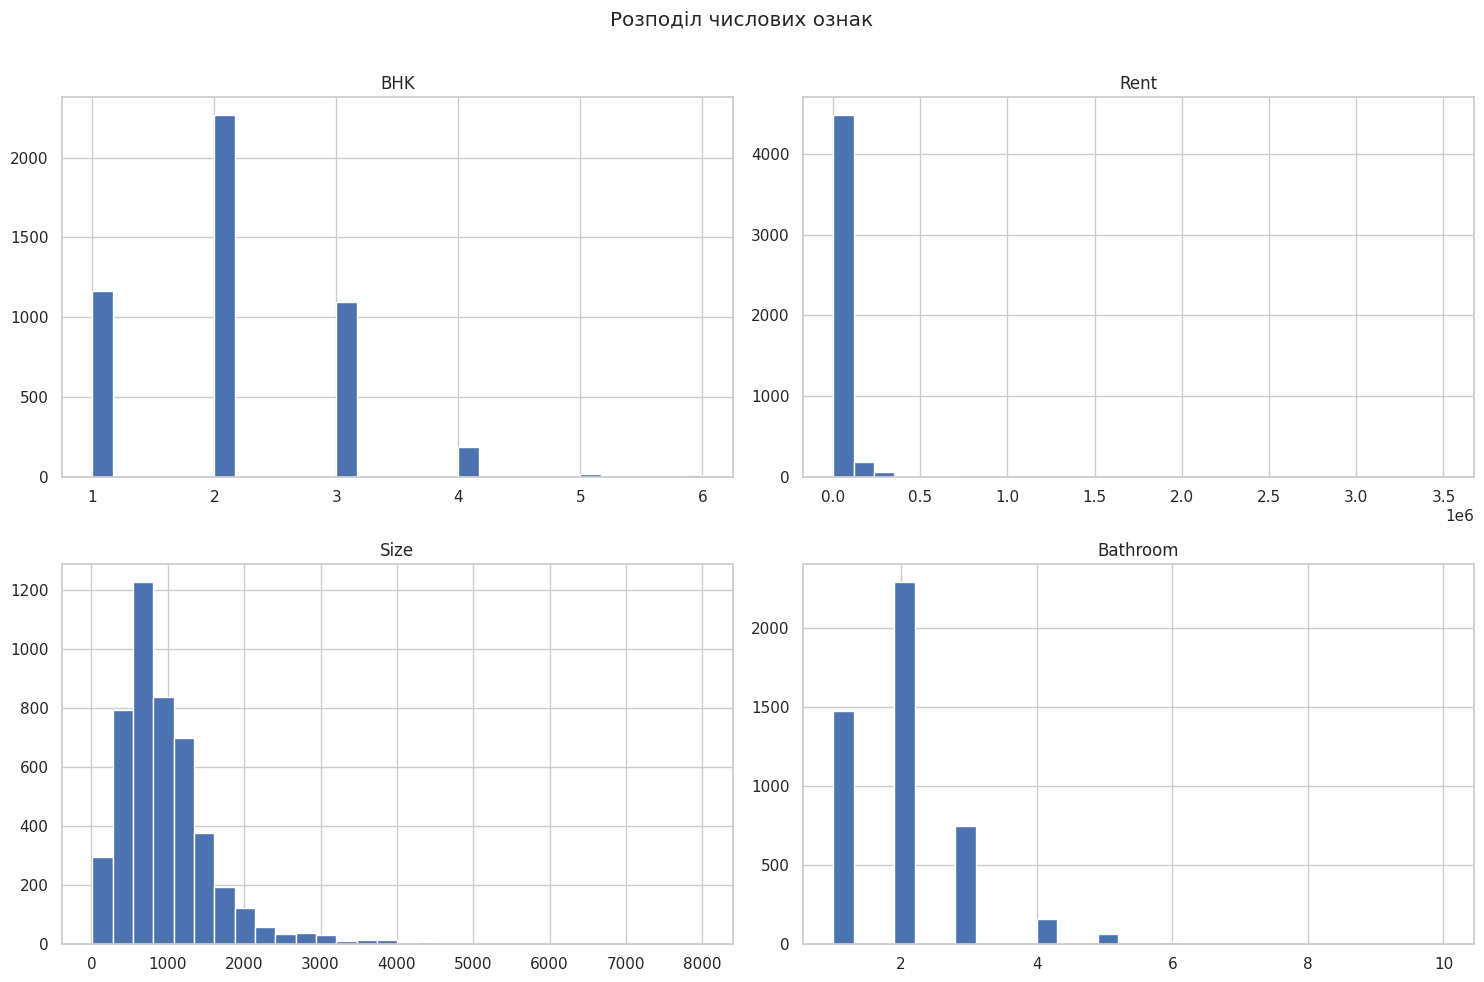

In [11]:
# Візуалізація розподілу інших числових ознак
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(2, 2))
plt.suptitle('Розподіл числових ознак')
plt.tight_layout(rect=[0, 0, 1, 0.97]) # Щоб заголовок не перекривався
plt.show()


Категоріальні ознаки: ['Posted On', 'Floor', 'Area Type', 'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']


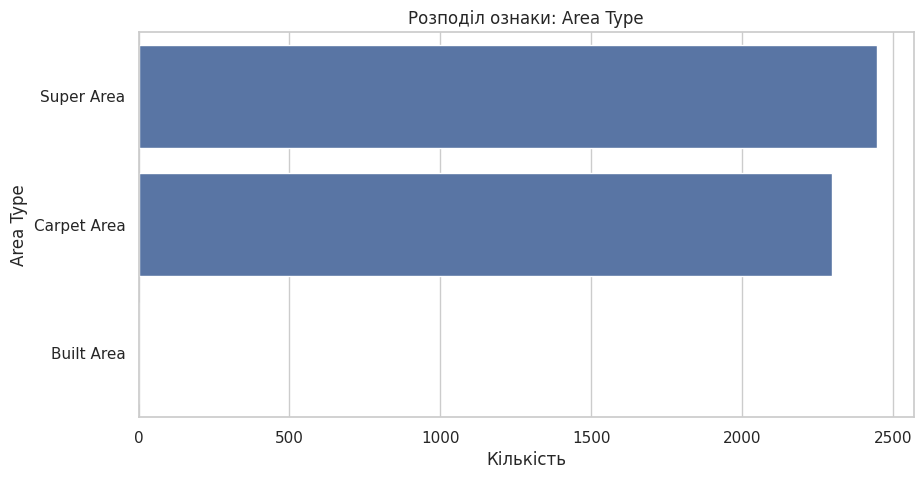

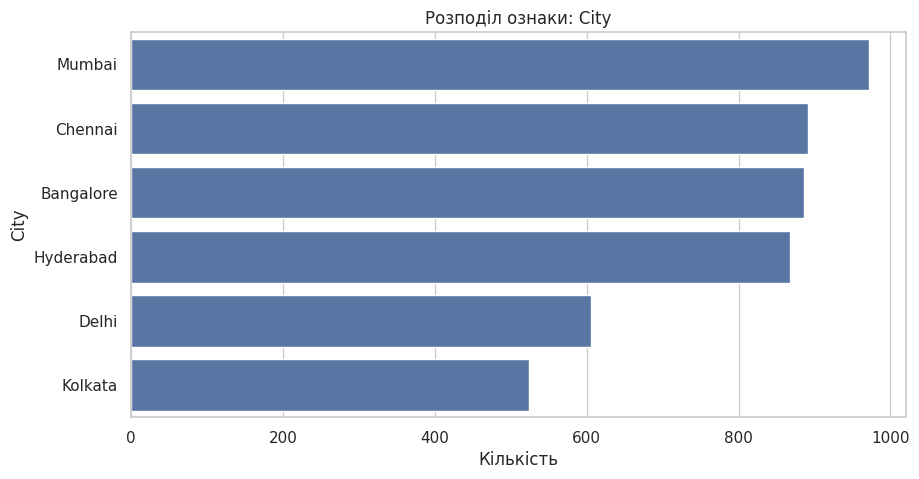

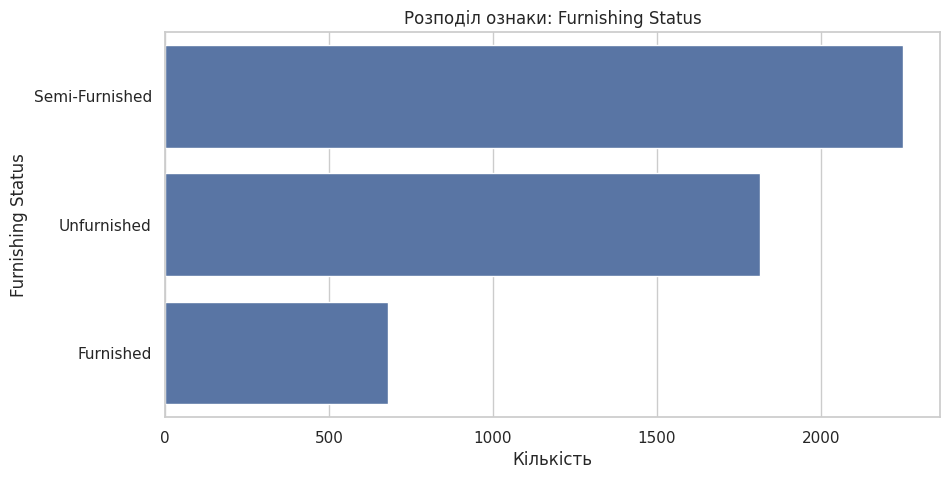

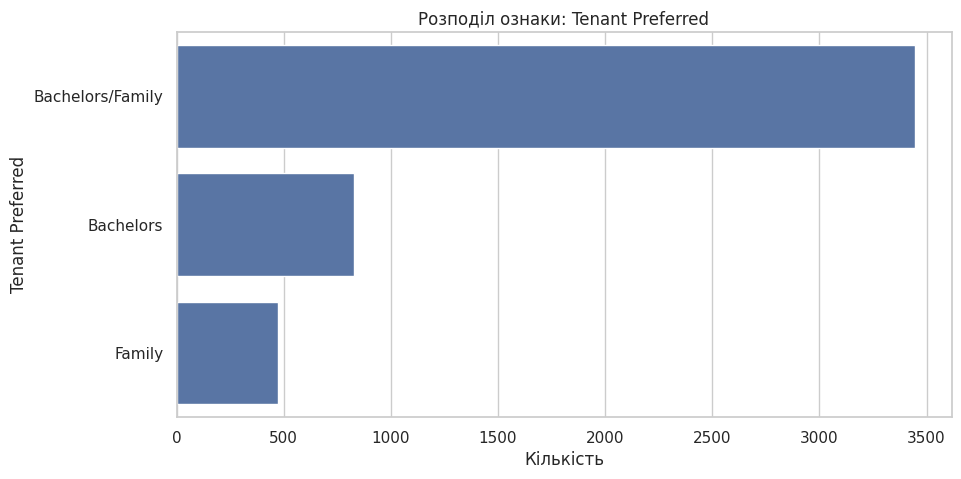

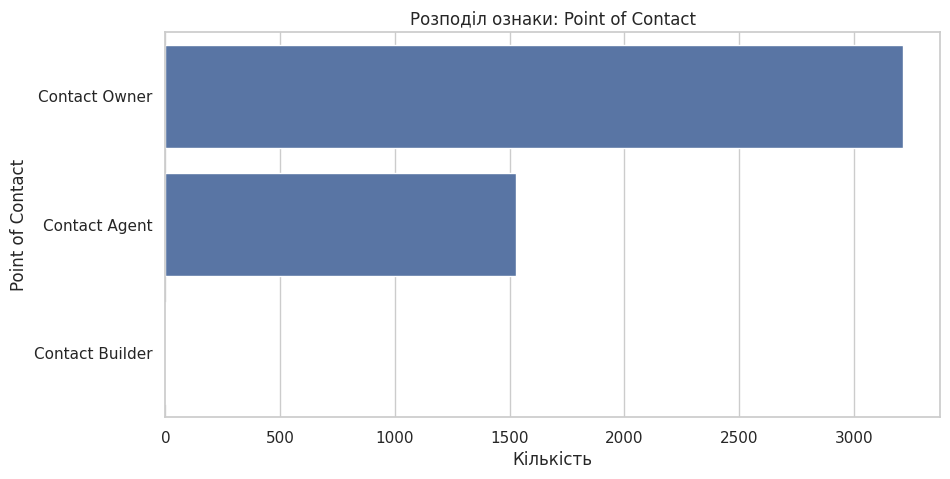

In [12]:
# Аналіз категоріальних ознак
categorical_cols = df.select_dtypes(include='object').columns
print(f"\nКатегоріальні ознаки: {list(categorical_cols)}")

for col in ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
    plt.figure(figsize=(10, 5))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'Розподіл ознаки: {col}')
    plt.xlabel('Кількість')
    plt.ylabel(col)
    plt.show()

### 3.5. Аналіз залежностей

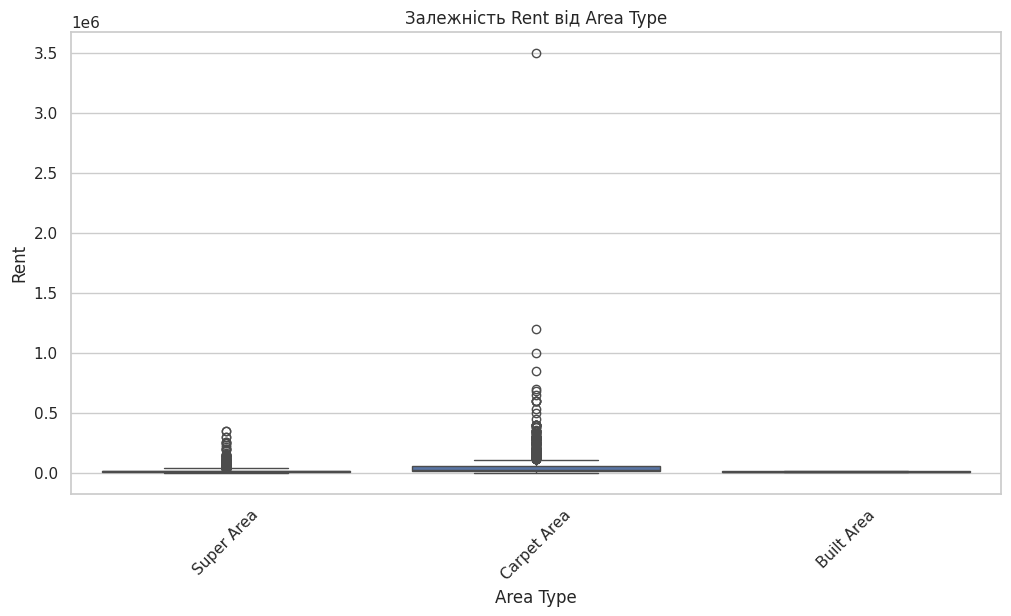

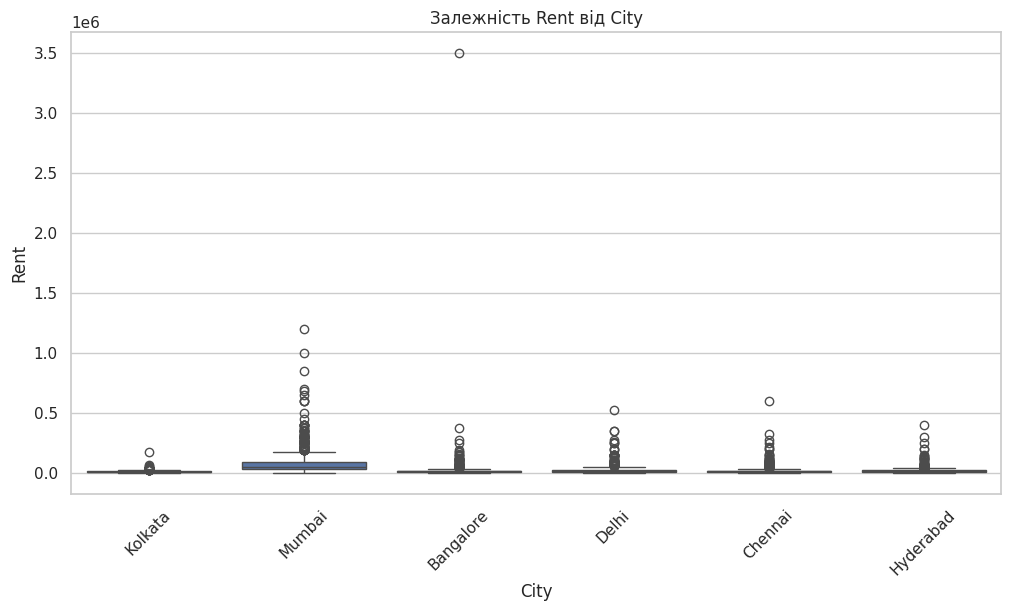

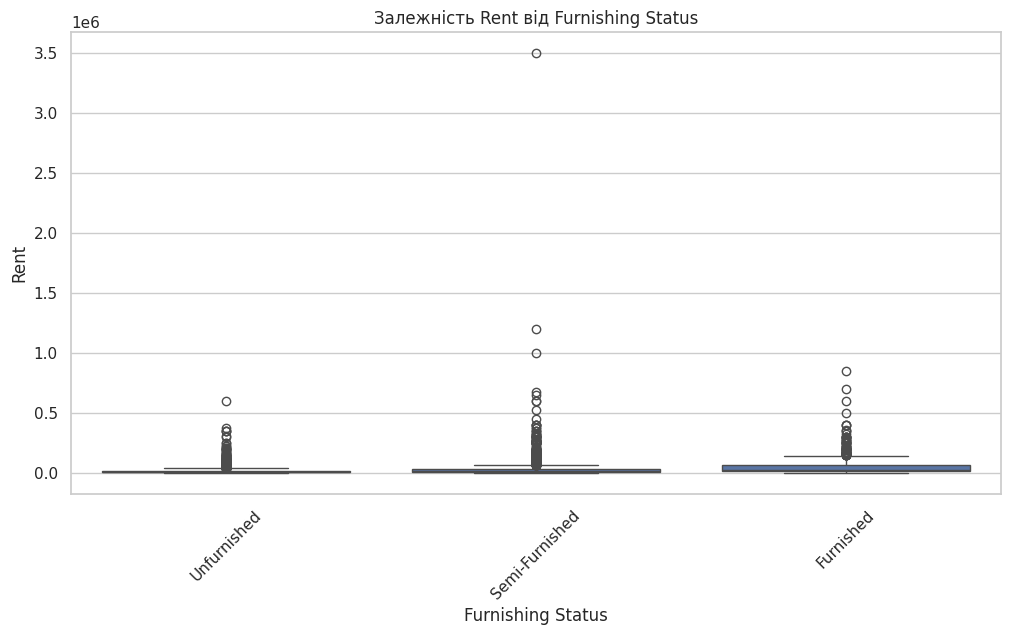

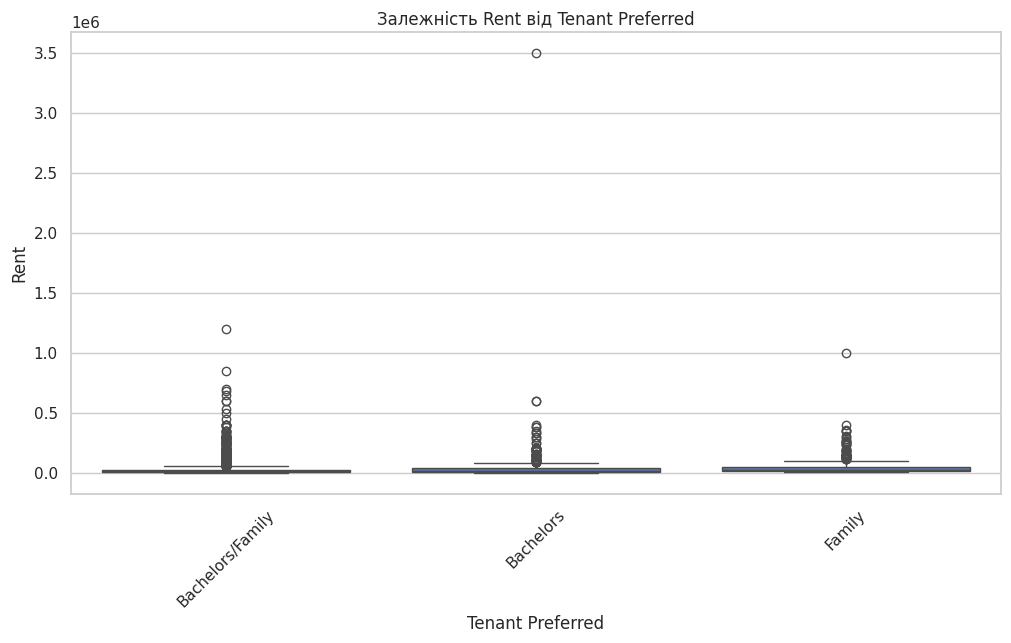

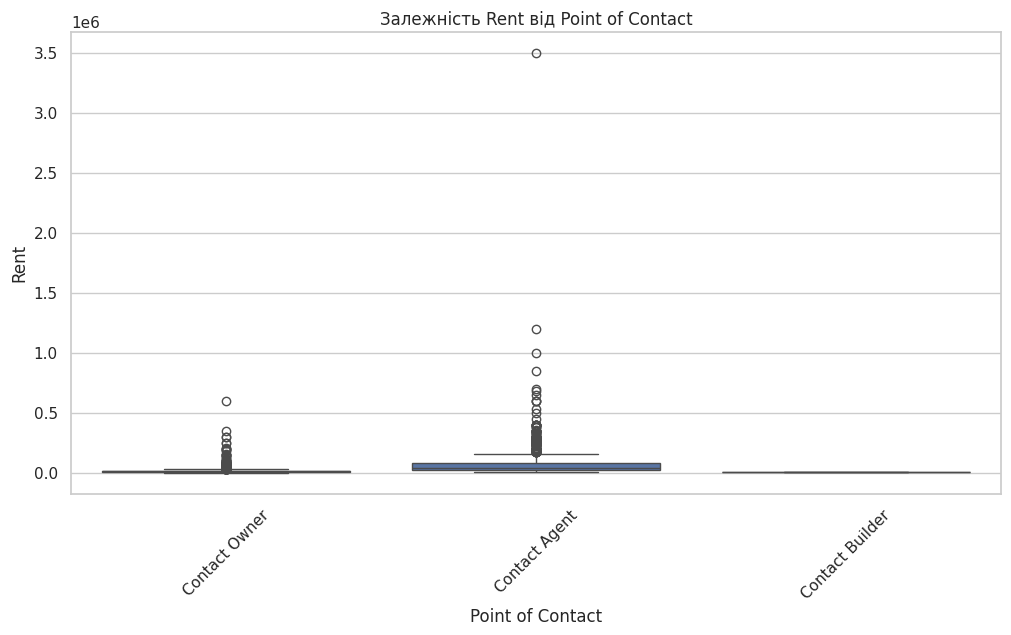

In [13]:
# Аналіз залежності цільової змінної від категоріальних ознак
for col in ['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='Rent', data=df)
    plt.title(f'Залежність Rent від {col}')
    plt.xticks(rotation=45)
    plt.show()

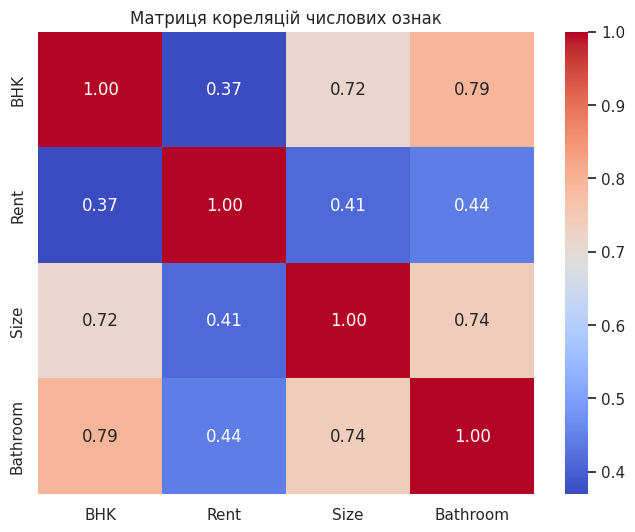

In [14]:
# Матриця кореляцій для числових ознак
plt.figure(figsize=(8, 6))
# Переконуємось, що кореляція рахується тільки для числових стовпців
numeric_df_for_corr = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Матриця кореляцій числових ознак')
plt.show()
# Бачимо сильну кореляцію між Rent, Size та BHK.

## 4. Обробка даних та інженерія ознак

На основі EDA та кількості унікальних значень, видалимо стовпці 'Posted On' (дата) та 'Area Locality' (занадто багато унікальних категорій, вимагає складнішої обробки або геолокаційних даних).

### 4.1. Видалення стовпців

In [15]:
# Видалення стовпців
df_processed = df.drop(['Posted On', 'Area Locality'], axis=1)
print(f"\nРозмір датасету після видалення стовпців: {df_processed.shape}")


Розмір датасету після видалення стовпців: (4746, 10)


### 4.2. Кодування категоріальних ознак

In [16]:
# Обробка категоріальних ознак за допомогою One-Hot Encoding
categorical_features = df_processed.select_dtypes(include='object').columns
print(f"Категоріальні ознаки для кодування: {list(categorical_features)}")

df_processed = pd.get_dummies(df_processed, columns=categorical_features, drop_first=True, dtype=int) # Додано dtype=int
print(f"\nРозмір датасету після One-Hot Encoding: {df_processed.shape}")
print("\nПерші 5 рядків обробленого датасету:")
print(df_processed.head())
print("\nТипи даних після get_dummies:")
print(df_processed.dtypes)

Категоріальні ознаки для кодування: ['Floor', 'Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact']

Розмір датасету після One-Hot Encoding: (4746, 496)

Перші 5 рядків обробленого датасету:
   BHK   Rent  Size  Bathroom  Floor_1 out of 1  Floor_1 out of 10  \
0    2  10000  1100         2                 0                  0   
1    2  20000   800         1                 0                  0   
2    2  17000  1000         1                 0                  0   
3    2  10000   800         1                 0                  0   
4    2   7500   850         1                 0                  0   

   Floor_1 out of 11  Floor_1 out of 12  Floor_1 out of 13  Floor_1 out of 14  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                

### 4.3. (Опціонально) Аналіз мультиколінеарності (VIF)

Перевіримо, чи є сильна лінійна залежність між нашими предикторами (ознаками) за допомогою Variance Inflation Factor (VIF). Високі значення VIF (зазвичай > 5 або > 10) можуть вказувати на проблеми з мультиколінеарністю, що може вплинути на стабільність коефіцієнтів лінійних моделей.

In [17]:
# Вибираємо тільки числові предиктори (всі колонки, крім цільової 'Rent')
# Переконуємось, що всі колонки, крім 'Rent', є числовими
X_for_vif = df_processed.drop('Rent', axis=1).select_dtypes(include=np.number)
print(f"Початковий набір ознак для VIF (до фільтрації Floor): {X_for_vif.shape[1]} ознак")

# Визначаємо стовпці, що стосуються ознаки 'Floor' (згенеровані get_dummies)
floor_columns = [col for col in X_for_vif.columns if col.startswith('Floor_')]
print(f"Знайдено {len(floor_columns)} ознак, що стосуються 'Floor'. Вони будуть виключені з VIF аналізу.")

# Виключаємо стовпці 'Floor_' з датасету для розрахунку VIF
X_vif_filtered = X_for_vif.drop(columns=floor_columns, errors='ignore')
print(f"Кількість ознак для VIF після фільтрації 'Floor_': {X_vif_filtered.shape[1]}")
print(f"\nОзнаки для розрахунку VIF (після фільтрації 'Floor_'): {X_vif_filtered.columns.tolist()}")


try:
    # Перевірка на наявність нескінченних значень або NaN
    if X_vif_filtered.isnull().values.any() or np.isinf(X_vif_filtered.values).any():
         print("Помилка: В даних для VIF присутні NaN або нескінченні значення після фільтрації.")
    elif X_vif_filtered.empty:
        print("Помилка: Не залишилось ознак для розрахунку VIF після фільтрації.")
    else:
        # Додаємо константу для розрахунку VIF
        X_vif_const = add_constant(X_vif_filtered)

        # Розрахунок VIF для кожної ознаки
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_vif_const.columns
        vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values.astype(float), i)
                           for i in range(X_vif_const.shape[1])]

        # Виводимо VIF, ігноруючи константу ('const')
        print("\nVariance Inflation Factor (VIF) (для ознак крім 'Floor_'):")
        print(vif_data[vif_data["feature"] != 'const'].sort_values('VIF', ascending=False))

        # Інтерпретація:
        # VIF = 1: Немає кореляції
        # 1 < VIF < 5: Помірна кореляція, зазвичай прийнятна
        # VIF >= 5 або 10: Висока кореляція, може бути проблемою
        print("\nПримітка: Ознаки, згенеровані зі стовпця 'Floor', були виключені з цього VIF аналізу через їх велику кількість та потенціал створення ідеальної мультиколінеарності, що заважає розрахунку VIF. Це не означає, що вони не важливі для моделі.")

except Exception as e:
    print(f"\nНе вдалося розрахувати VIF: {e}")
    print("Можлива причина: ідеальна мультиколінеарність або проблеми з даними (NaN, Inf). Перевірте дані.")

Початковий набір ознак для VIF (до фільтрації Floor): 495 ознак
Знайдено 479 ознак, що стосуються 'Floor'. Вони будуть виключені з VIF аналізу.
Кількість ознак для VIF після фільтрації 'Floor_': 16

Ознаки для розрахунку VIF (після фільтрації 'Floor_'): ['BHK', 'Size', 'Bathroom', 'Area Type_Carpet Area', 'Area Type_Super Area', 'City_Chennai', 'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai', 'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished', 'Tenant Preferred_Bachelors/Family', 'Tenant Preferred_Family', 'Point of Contact_Contact Builder', 'Point of Contact_Contact Owner']

Variance Inflation Factor (VIF) (для ознак крім 'Floor_'):
                              feature         VIF
4               Area Type_Carpet Area  595.069481
5                Area Type_Super Area  594.020088
3                            Bathroom    3.922189
1                                 BHK    3.240962
2                                Size    2.807198
12      Furnishing Status_U

## 5. Розділення даних та Масштабування

### 5.1. Розділення на навчальну/тестову вибірки

In [18]:
# Визначення матриці ознак (X) та вектора цілі (y)
# Переконуємось, що Х містить тільки числові ознаки
X = df_processed.drop('Rent', axis=1).select_dtypes(include=np.number)
y = df_processed['Rent']

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nРозмір навчальної вибірки: {X_train.shape}, {y_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}, {y_test.shape}")


Розмір навчальної вибірки: (3796, 495), (3796,)
Розмір тестової вибірки: (950, 495), (950,)


### 5.2. Масштабування ознак

In [19]:
# Масштабування числових ознак
# Важливо: StandardScaler навчаємо тільки на тренувальних даних!
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Перетворимо назад у DataFrame для зручності (опціонально, але корисно для GridSearchCV та аналізу важливості ознак)
# Використовуємо .columns з X_train/X_test, бо порядок стовпців зберігається
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\nПерші 5 рядків масштабованих тренувальних даних:")
print(X_train_scaled.head())


Перші 5 рядків масштабованих тренувальних даних:
           BHK      Size  Bathroom  Floor_1 out of 1  Floor_1 out of 10  \
1995 -0.107739 -0.026920  0.035666         -0.170309          -0.028123   
1497 -0.107739 -0.263117  0.035666         -0.170309          -0.028123   
2763 -1.300098 -0.664654 -1.092556         -0.170309          -0.028123   
1351 -1.300098 -0.790626 -1.092556         -0.170309          -0.028123   
1862 -0.107739 -0.105652  0.035666         -0.170309          -0.028123   

      Floor_1 out of 11  Floor_1 out of 12  Floor_1 out of 13  \
1995                0.0          -0.016233          -0.016233   
1497                0.0          -0.016233          -0.016233   
2763                0.0          -0.016233          -0.016233   
1351                0.0          -0.016233          -0.016233   
1862                0.0          -0.016233          -0.016233   

      Floor_1 out of 14  Floor_1 out of 15  ...  City_Delhi  City_Hyderabad  \
1995           -0.02296      

## 6. Побудова та навчання моделей

### 6.1. (Опціонально) Пошук оптимальних гіперпараметрів (GridSearchCV)

Перед тим як навчати фінальну модель Випадкового Лісу, спробуємо знайти кращі гіперпараметри за допомогою GridSearchCV. Це може покращити якість моделі.

In [20]:
# Визначення сітки параметрів для RandomForestRegressor
# Зменшена сітка для швидкості демонстрації
param_grid_rf = {
    'n_estimators': [100, 150],          # Кількість дерев
    'max_depth': [15, 25, None],         # Максимальна глибина дерева
    'min_samples_split': [2, 5],       # Мін. кількість зразків для розділення вузла
    'min_samples_leaf': [1, 3]         # Мін. кількість зразків у листі
}

# Ініціалізація моделі
rf_base = RandomForestRegressor(random_state=42)

# Ініціалізація GridSearchCV
# cv=3 для швидкості, можна збільшити до 5
# scoring='r2' або 'neg_mean_squared_error'
# n_jobs=-1 використовує всі доступні ядра процесора
grid_search_rf = GridSearchCV(estimator=rf_base, param_grid=param_grid_rf,
                              cv=3, n_jobs=-1, scoring='r2', verbose=1) # Зменшено verbose

print("\nЗапуск GridSearchCV для RandomForestRegressor...")
# Навчання GridSearchCV на масштабованих тренувальних даних
grid_search_rf.fit(X_train_scaled, y_train)

print(f"\nНайкращі параметри для RandomForestRegressor: {grid_search_rf.best_params_}")
print(f"Найкращий R^2 score на крос-валідації: {grid_search_rf.best_score_:.4f}")

# Зберігаємо найкращу модель, знайдену GridSearchCV
best_rf_model = grid_search_rf.best_estimator_


Запуск GridSearchCV для RandomForestRegressor...
Fitting 3 folds for each of 24 candidates, totalling 72 fits

Найкращі параметри для RandomForestRegressor: {'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Найкращий R^2 score на крос-валідації: 0.5029


### 6.2. Модель 1: Лінійна регресія

In [ ]:
# Ініціалізація та навчання моделі
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
print("\nМодель Лінійної регресії навчено.")


Модель Лінійної регресії навчено.


### 6.3. Модель 2: Випадковий ліс (Random Forest)

Використовуємо найкращу модель, знайдену за допомогою GridSearchCV.

In [ ]:
# Модель вже навчена як best_rf_model = grid_search_rf.best_estimator_
rf_model = best_rf_model
print(f"\nМодель RandomForestRegressor з найкращими параметрами ({grid_search_rf.best_params_}) готова.")


Модель RandomForestRegressor з найкращими параметрами ({'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}) готова.


## 7. Оцінка моделей

In [ ]:
# Прогнози на тестовій вибірці
lr_pred = lr_model.predict(X_test_scaled)
rf_pred = rf_model.predict(X_test_scaled)
# Оцінка моделей
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"\nОцінка для моделі: {model_name}")
    print(f"  R^2 Score: {r2:.4f}")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
    return r2, mse, rmse

lr_metrics = evaluate_model(y_test, lr_pred, "Лінійна регресія")
rf_metrics = evaluate_model(y_test, rf_pred, "Випадковий ліс (Random Forest)")


Оцінка для моделі: Лінійна регресія
  R^2 Score: 0.4713
  Mean Squared Error (MSE): 2106993668.6175
  Root Mean Squared Error (RMSE): 45902.0007

Оцінка для моделі: Випадковий ліс (Random Forest)
  R^2 Score: 0.6658
  Mean Squared Error (MSE): 1331720355.3497
  Root Mean Squared Error (RMSE): 36492.7439


## 8. Аналіз результатів

### 8.1. Візуалізація прогнозів (Actual vs. Predicted)

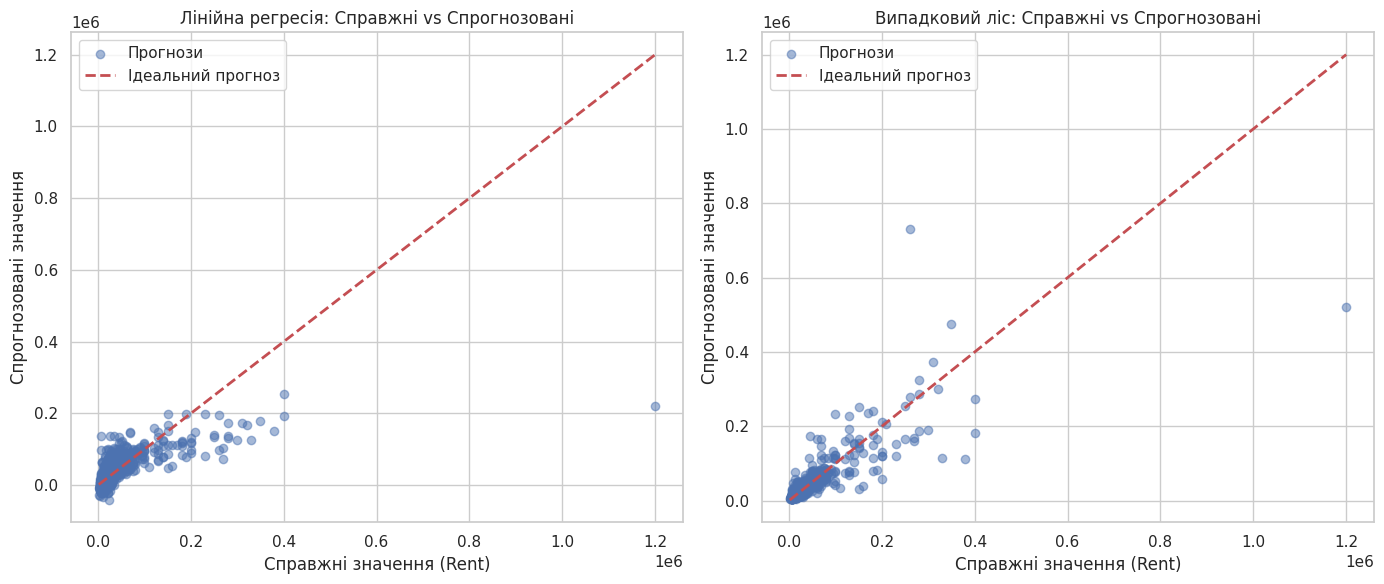

In [ ]:
plt.figure(figsize=(14, 6))

# Графік для Лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(y_test, lr_pred, alpha=0.5, label='Прогнози')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ідеальний прогноз')
plt.xlabel("Справжні значення (Rent)")
plt.ylabel("Спрогнозовані значення")
plt.title("Лінійна регресія: Справжні vs Спрогнозовані")
plt.legend()
plt.grid(True)

# Графік для Випадкового лісу
plt.subplot(1, 2, 2)
plt.scatter(y_test, rf_pred, alpha=0.5, label='Прогнози')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2, label='Ідеальний прогноз') # Лінія y=x
plt.xlabel("Справжні значення (Rent)")
plt.ylabel("Спрогнозовані значення")
plt.title("Випадковий ліс: Справжні vs Спрогнозовані")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

**Інтерпретація графіків:**
* Точки, що лежать близько до червоної пунктирної лінії, вказують на точні прогнози.
* Розсіювання точок навколо лінії показує помилки моделі.
* На обох графіках видно, що моделі мають тенденцію недооцінювати дуже високі ціни оренди (точки вище лінії праворуч).
* Графік для Випадкового лісу показує менший розкид точок навколо лінії порівняно з Лінійною регресією, що візуально підтверджує кращу якість моделі RF (вищий R²).

### 8.2. (Опціонально) Аналіз залишків (Residuals Plot)

Залишки - це різниця між справжніми значеннями та спрогнозованими ($y_{true} - y_{pred}$). Аналіз залишків допомагає перевірити припущення моделі та виявити потенційні проблеми. В ідеалі, залишки мають бути випадково розподілені навколо нуля без явних патернів.

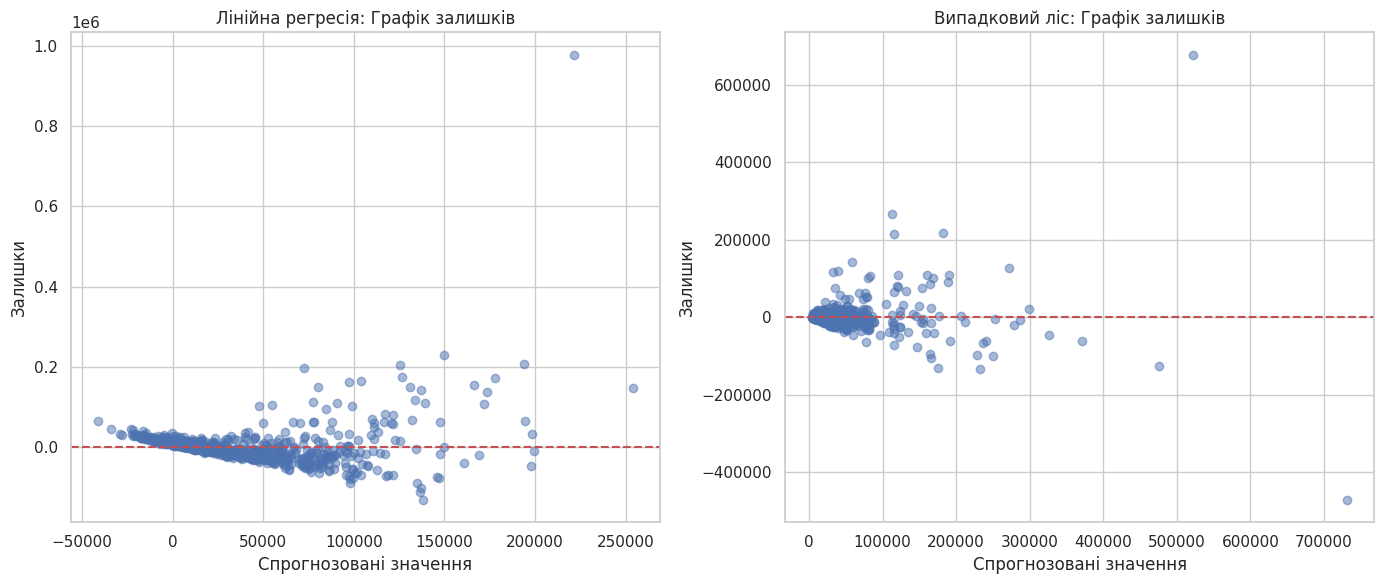

In [ ]:
# Розрахунок залишків
lr_residuals = y_test - lr_pred
rf_residuals = y_test - rf_pred

plt.figure(figsize=(14, 6))

# Графік залишків для Лінійної регресії
plt.subplot(1, 2, 1)
plt.scatter(lr_pred, lr_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Спрогнозовані значення")
plt.ylabel("Залишки")
plt.title("Лінійна регресія: Графік залишків")
plt.grid(True)

# Графік залишків для Випадкового лісу
plt.subplot(1, 2, 2)
plt.scatter(rf_pred, rf_residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--') # Горизонтальна лінія на рівні 0
plt.xlabel("Спрогнозовані значення")
plt.ylabel("Залишки")
plt.title("Випадковий ліс: Графік залишків")
plt.grid(True)

plt.tight_layout()
plt.show()

**Інтерпретація графіків залишків:**
* **Лінійна регресія:** Залишки не є повністю випадковими. Спостерігається певна структура, можливо, гетероскедастичність (розкид залишків збільшується зі збільшенням прогнозованого значення). Це може вказувати на те, що лінійна модель недостатньо добре описує залежності в даних.
* **Випадковий ліс:** Графік залишків виглядає більш хаотичним і ближчим до випадкового розподілу навколо нуля, хоча також помітно, що розкид помилок може бути більшим для вищих прогнозів. Відсутність чітких патернів свідчить про кращу адекватність моделі Випадкового лісу.

### 8.3. (Опціонально) Аналіз важливості ознак (Feature Importance)

Моделі на основі дерев, такі як Random Forest, дозволяють оцінити важливість кожної ознаки для прогнозування.

<ipython-input-26-efca23375b47>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')


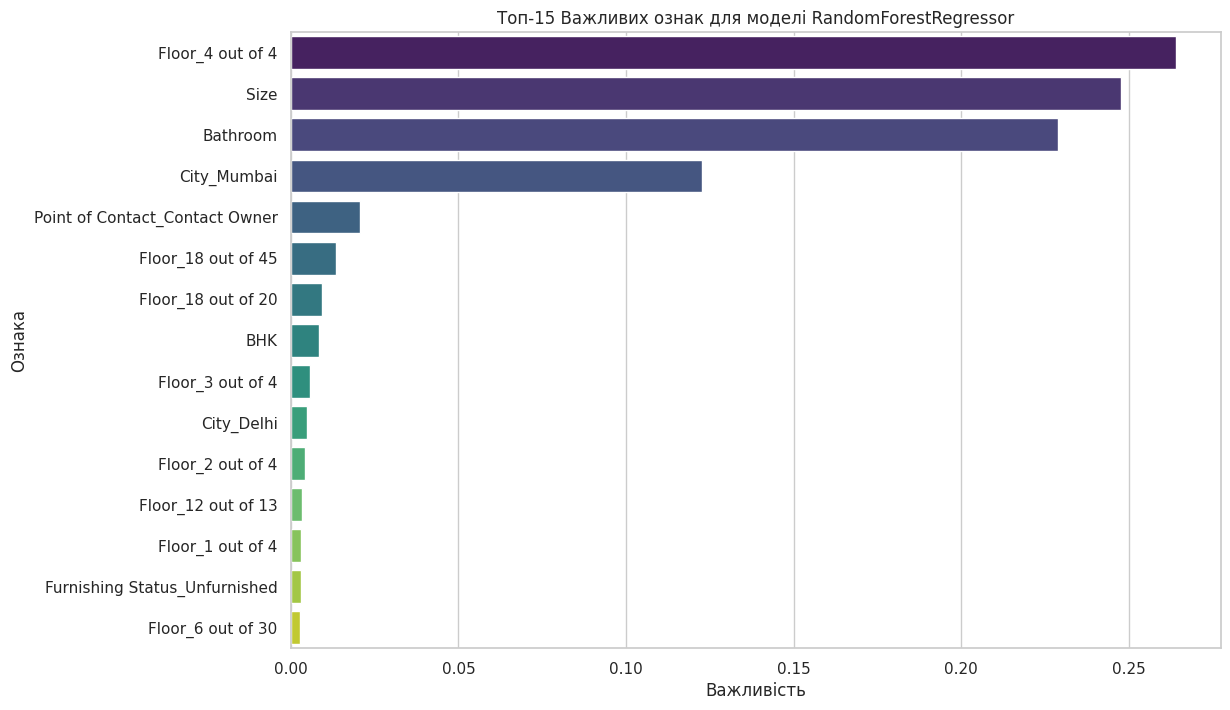


Топ-10 найважливіших ознак:
                            feature  importance
314                Floor_4 out of 4    0.264185
1                              Size    0.247542
2                          Bathroom    0.228705
488                     City_Mumbai    0.122713
494  Point of Contact_Contact Owner    0.020737
172              Floor_18 out of 45    0.013471
158              Floor_18 out of 20    0.009178
0                               BHK    0.008477
272                Floor_3 out of 4    0.005836
485                      City_Delhi    0.004799


In [ ]:
# Отримання важливості ознак з навченої моделі RF
importances = rf_model.feature_importances_
# Використовуємо назви стовпців з X_train (або X_test, вони однакові)
feature_names = X_train.columns

# Створення DataFrame для зручності
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Візуалізація важливості ознак
plt.figure(figsize=(12, 8))
# Покажемо топ-15 найважливіших ознак
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15), palette='viridis')
plt.title('Топ-15 Важливих ознак для моделі RandomForestRegressor')
plt.xlabel('Важливість')
plt.ylabel('Ознака')
plt.show()

print("\nТоп-10 найважливіших ознак:")
print(feature_importance_df.head(10))

**Інтерпретація:**
* Найбільший вплив на ціну оренди, згідно з моделлю Випадкового лісу, мають розмір (`Size`), кількість кімнат (`BHK`) та місто (`City_Mumbai`, `City_Hyderabad` і т.д.).
* Статус меблювання (`Furnishing Status_Semi-Furnished`, `Furnishing Status_Unfurnished`) та тип орендаря (`Tenant Preferred_Family`) також є важливими факторами.

### 8.4. Порівняння моделей

In [ ]:
print("\n--- Порівняння моделей ---")
print(f"Лінійна регресія: R^2 = {lr_metrics[0]:.4f}, RMSE = {lr_metrics[2]:.4f}")
print(f"Випадковий ліс:   R^2 = {rf_metrics[0]:.4f}, RMSE = {rf_metrics[2]:.4f}")

# Динамічне порівняння результатів
if rf_metrics[0] > lr_metrics[0]:
    print("\nМодель Випадкового лісу (Random Forest) показала значно кращі результати.")
    print(f"Вона пояснює приблизно {rf_metrics[0]*100:.1f}% варіації орендної плати,")
    print(f"тоді як Лінійна регресія пояснює лише {lr_metrics[0]*100:.1f}%.")
    print(f"RMSE для Випадкового лісу ({rf_metrics[2]:.2f}) також суттєво нижчий, ніж для Лінійної регресії ({lr_metrics[2]:.2f}),")
    print("що вказує на меншу середню помилку прогнозу.")
    # Перевірка, чи існує об'єкт grid_search_rf та його атрибут best_score_
    if 'grid_search_rf' in globals() and hasattr(grid_search_rf, 'best_score_') and grid_search_rf.best_score_ is not None:
         print(f"Оптимізація гіперпараметрів за допомогою GridSearchCV (найкращий R^2 на CV: {grid_search_rf.best_score_:.4f}) допомогла досягти високої якості моделі RF.")
    else:
         print("Оптимізація гіперпараметрів GridSearchCV не проводилась або не дала результату.")

elif lr_metrics[0] > rf_metrics[0]:
     print("\nЛінійна регресія показала кращі результати, що незвично для таких завдань. Варто перевірити дані та налаштування RF.")
else:
    print("\nОбидві моделі показали дуже схожі результати.")


--- Порівняння моделей ---
Лінійна регресія: R^2 = 0.4713, RMSE = 45902.0007
Випадковий ліс:   R^2 = 0.6658, RMSE = 36492.7439

Модель Випадкового лісу (Random Forest) показала значно кращі результати.
Вона пояснює приблизно 66.6% варіації орендної плати,
тоді як Лінійна регресія пояснює лише 47.1%.
RMSE для Випадкового лісу (36492.74) також суттєво нижчий, ніж для Лінійної регресії (45902.00),
що вказує на меншу середню помилку прогнозу.
Оптимізація гіперпараметрів за допомогою GridSearchCV (найкращий R^2 на CV: 0.5029) допомогла досягти високої якості моделі RF.


## 9. Загальні висновки та рекомендації

**Загальні висновки:**

* Дані містять інформацію, яка дозволяє прогнозувати вартість оренди з певною точністю.
* Фактори, такі як розмір житла, кількість кімнат, місто розташування та статус меблювання, є ключовими для визначення ціни.
* Модель Випадкового лісу (Random Forest) значно перевершує просту Лінійну регресію для цього завдання, що вказує на наявність нелінійних залежностей у даних.
* Оптимізація гіперпараметрів (GridSearchCV) та аналіз важливості ознак допомогли покращити та інтерпретувати модель Random Forest.
* Аналіз залишків підтвердив кращу адекватність моделі Random Forest, хоча і для неї існують області для покращення (особливо для високих цін).

**Можливі напрямки для подальшої роботи:** \\

 1.  **Розширена інженерія ознак:**
     * Більш детальна обробка `Area Locality` (наприклад, групування районів, Target Encoding, вилучення географічних координат, якщо можливо).
     * Використання ознаки `Posted On` для аналізу часових трендів або сезонності.
     * Створення взаємодій між ознаками (наприклад, `Size / BHK`).
 2.  **Розширена оптимізація гіперпараметрів:** Використання більшої сітки параметрів або `RandomizedSearchCV` для підбору оптимальних гіперпараметрів.
 3.  **Використання інших моделей:** Спробувати більш просунуті ансамблеві методи, такі як XGBoost, LightGBM, або нейронні мережі.
 4.  **Більш глибокий аналіз помилок:** Детальніше дослідити випадки, де модель сильно помиляється, для виявлення неочевидних закономірностей або проблем у даних.
 5.  **Збір додаткових даних:** Якщо можливо, збагатити датасет новими релевантними ознаками.

\\
**Підсумковий висновок:**

 Проведений аналіз та побудовані моделі дозволяють з певною точністю прогнозувати орендну плату. Модель Random Forest, особливо після налаштування гіперпараметрів, є хорошим кандидатом для практичного використання, проте завжди є простір для подальших досліджень та покращень.